# Discrete Dynamical Systems

In this notebook we will run some simple simulations for **discrete dyanamical
systems** of interests, starting from a _linear birth_ model, ending up with a
_resource-consumer_ model, involving **non linearity** and **interactions**.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Linear Birth

One of the simplest dynamical system model is the **linear birth** model that
provides a simple formula to simulate the growth of a population by a given
factor.

The full formula involves 3 main components:

- $\lambda$: the number of offsprings generated by every individual every
  $\sigma$ time unit.
- $\sigma$: the number of time units after an individual generates an offspring.
- $\Delta t$ is the time step.

All put together, the final formula is

$$N(t + \Delta t) = N(t) + \lambda \frac{\Delta t}{\sigma} N(t)$$

where $\frac{\Delta t}{\sigma}$ describes the number of _birth moments_ for
every individual in the interval $[t, t + \Delta t)$. Equation that can be
rewritten as follows:

$$N(t + \Delta t) = \left( 1 + \lambda \frac{\Delta t}{\sigma} \right) N(t)$$

It is also possible to group $\left( 1 + \lambda \frac{\Delta t}{\sigma} \right)$
into $r_d$, that takes the name of system's **birth rate**, so that we have

$$N_{t+1} = r_d \cdot N_t$$

that is more simple and clear.

In [11]:
def linear_birth(n0, rate, t):
    if t == 0:
        return n0
    return rate * linear_birth(n0, rate, t - 1)


Let's now run some simulations with different initial population densities and
different values for the birth rate.

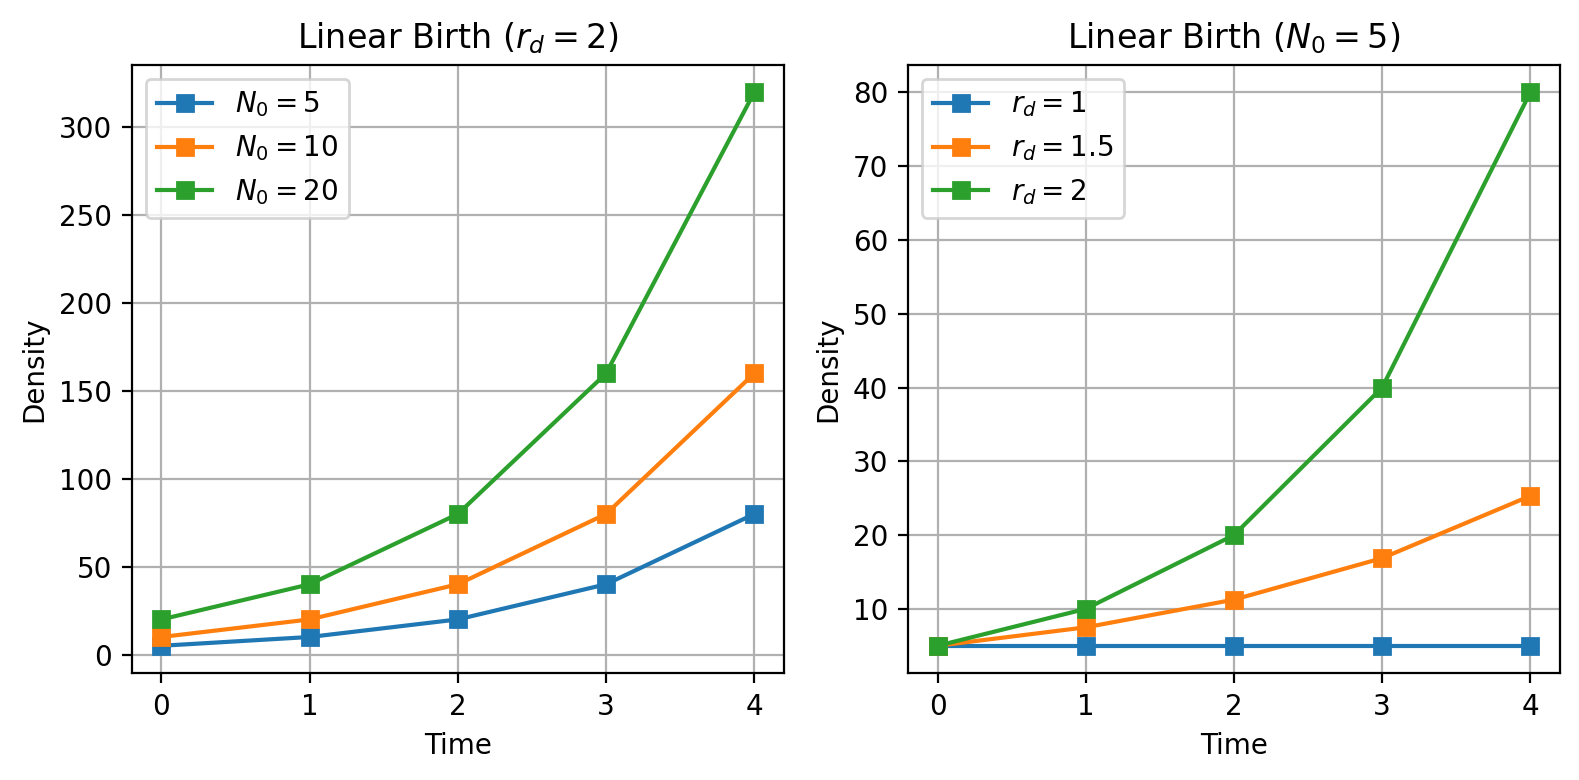

In [50]:
times = [i for i in range(5)]

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

r_d = 2
ax1.set_title(rf"Linear Birth ($r_d = {r_d}$)")
ax1.set_xlabel("Time")
ax1.set_ylabel("Density")
n0s = [5, 10, 20]
for n0 in n0s:
    ax1.plot(times, [linear_birth(n0, 2, t) for t in times], marker="s", label=rf"$N_0 = {n0}$")
ax1.legend()
ax1.grid()

N_0 = 5
ax2.set_title(rf"Linear Birth ($N_0 = {N_0}$)")
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
rates = [1, 1.5, 2]
for rd in rates:
    ax2.plot(times, [linear_birth(N_0, rd, t) for t in times], marker="s", label=rf"$r_d = {rd}$")
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

### Linear Birth/Death

In order to more complexity is possible to model also deaths by adding a
**death rate** ($s_d$), that is fraction of the total population 
($0 \leq s_d \leq 1$). Now the formula becomes

$$N_{t+1} = r_d \cdot N_t - s_d \cdot N_t$$

that can be rewritten as

$$N_{t+1} = (r_d - s_d) \cdot N_t = \alpha_d \cdot N_t$$

obtaining $\alpha_d$ that is greater or equal to zero.


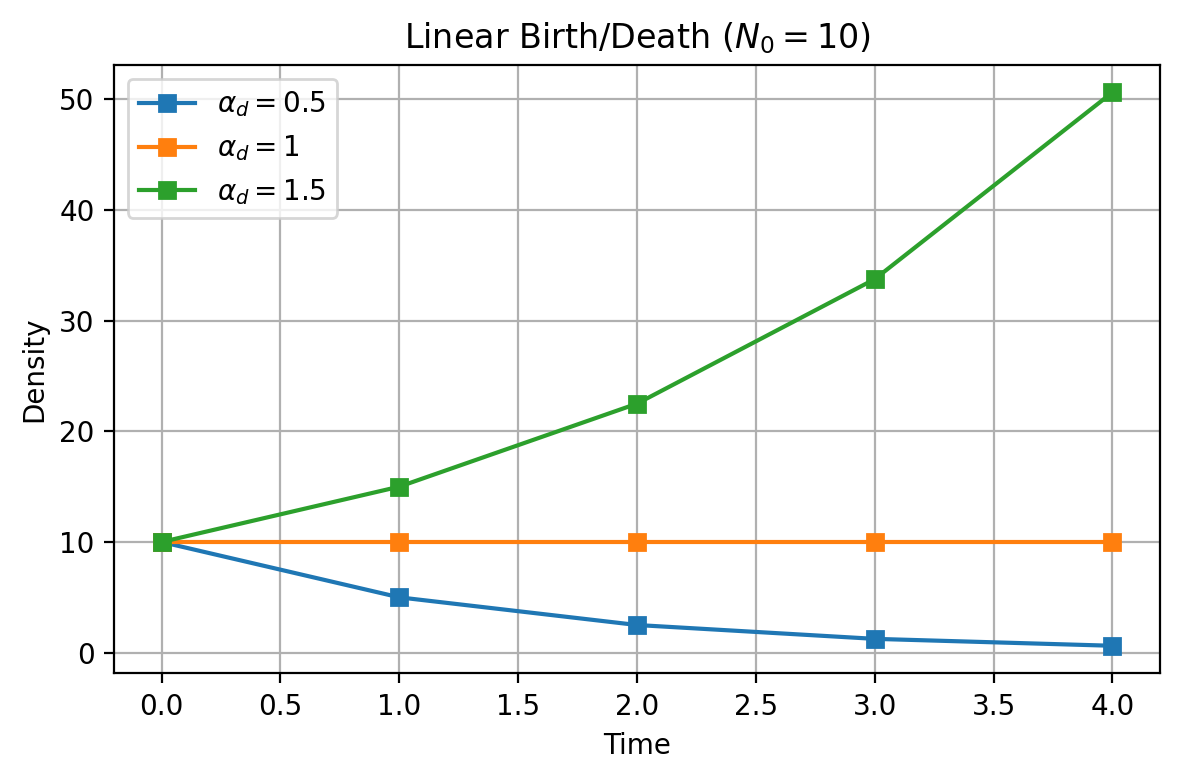

In [49]:
times = [i for i in range(5)]

plt.figure(figsize=(6, 4), dpi=200)

N_0 = 10
plt.title(rf"Linear Birth/Death ($N_0 = {N_0}$)")
plt.xlabel("Time")
plt.ylabel("Density")
alphas = [0.5, 1, 1.5]
for alpha in alphas:
    plt.plot(times,
             [linear_birth(N_0, alpha, t) for t in times],
             marker="s", label=rf"$\alpha_d = {alpha}$",
        )
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()